# Classification Neural Network

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing prepared dataset
import pickle
input = open('data_LogRegr.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [3]:
#!pip install Tensorflow
#!pip install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(10, activation = 'relu', input_dim = 8))

# Adding the output layer
cnn.add(Dense(5, activation = 'sigmoid'))


# Adding the output layer
cnn.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
import sys
sys.setrecursionlimit(10000)

In [6]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size =27, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
2/2 [==============================] - 1s 391ms/step - loss: 0.8080 - accuracy: 0.3922 - val_loss: 0.7327 - val_accuracy: 0.4444
Epoch 2/100
2/2 [==============================] - 0s 48ms/step - loss: 0.8044 - accuracy: 0.3922 - val_loss: 0.7290 - val_accuracy: 0.4444
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 0.8001 - accuracy: 0.4118 - val_loss: 0.7254 - val_accuracy: 0.4444
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 0.7968 - accuracy: 0.3922 - val_loss: 0.7219 - val_accuracy: 0.4444
Epoch 5/100
2/2 [==============================] - 0s 37ms/step - loss: 0.7930 - accuracy: 0.3922 - val_loss: 0.7184 - val_accuracy: 0.4444
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 0.7890 - accuracy: 0.3922 - val_loss: 0.7150 - val_accuracy: 0.4444
Epoch 7/100
2/2 [==============================] - 0s 39ms/step - loss: 0.7858 - accuracy: 0.3922 - val_loss: 0.7117 - val_accuracy: 0.4444
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 29ms/step - loss: 0.6661 - accuracy: 0.6275 - val_loss: 0.6077 - val_accuracy: 0.7778
Epoch 60/100
2/2 [==============================] - 0s 30ms/step - loss: 0.6648 - accuracy: 0.6275 - val_loss: 0.6067 - val_accuracy: 0.7778
Epoch 61/100
2/2 [==============================] - 0s 30ms/step - loss: 0.6634 - accuracy: 0.6078 - val_loss: 0.6057 - val_accuracy: 0.7778
Epoch 62/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6623 - accuracy: 0.6078 - val_loss: 0.6046 - val_accuracy: 0.7778
Epoch 63/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6612 - accuracy: 0.6078 - val_loss: 0.6036 - val_accuracy: 0.7778
Epoch 64/100
2/2 [==============================] - 0s 31ms/step - loss: 0.6600 - accuracy: 0.6078 - val_loss: 0.6027 - val_accuracy: 0.7778
Epoch 65/100
2/2 [==============================] - 0s 31ms/step - loss: 0.6590 - accuracy: 0.6275 - val_loss: 0.6017 - val_accuracy: 0.7778
Epoch 66/100
2/2 [========

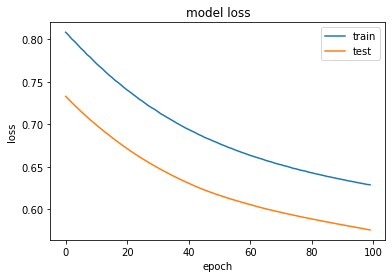

In [7]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [10]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.4)

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 3]
 [1 5]]


Итак, построена Нейронная Сеть для модели классификации. Был проведен ряд экспериментов с множеством параметров, таких как: количество слоев, число batch_size, порог отсечения.

Оптимальное количество слоев - 2 
batch_size изменялось от 8 до 60, однако оптимальным является 27. Остальные случаи уменьшают верное распознавание на 3-7 наблюдений.
Порог отсичения - оптимальное значение при y_pred > 0.4. Этот параметр наибольшим образом влияет на правильность распознавания обьектов и при изменении на 0,1 - до 10 обьектов могут быть неверно распознаны.
Таким образом, в данной моделе при оптимальных параметрах неверно распознано 4 обьектов, что дает немного хуже результат, чем в моделе Логистической регрессиии. Но стоит отметить, что выборка получилась сбалансированная.

# Поскольку в условиях задачи было сказано, что нужно построить базовую модель и сравнить ее с НС - делаем вывод, что модель Логистической регрессии со своей задачей справилась лучше. Именно ее и рекомендовано использовать для дальнейшего исследования.